In [1]:
import pandas as pd
import numpy as np
# from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('storedata.csv')

In [3]:
df.head(2)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good


In [4]:
df_copy = df.copy()

### train test split

In [5]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, shuffle=True)

train, test = train_test_split(df_copy, random_state=42, test_size=0.30, shuffle=True)

In [6]:
print(f'length of train data :{len(train)}')
print(f'length of test data :{len(test)}')

length of train data :95
length of test data :41


### drop irrelavent columns

In [7]:
train.drop_duplicates(inplace=True)

test.drop_duplicates(inplace=True)

In [8]:
train.drop(['Manager name', 'Country', 'Town'], axis=1, inplace=True)

test.drop(['Manager name', 'Country', 'Town'], axis=1, inplace=True)

<AxesSubplot:>

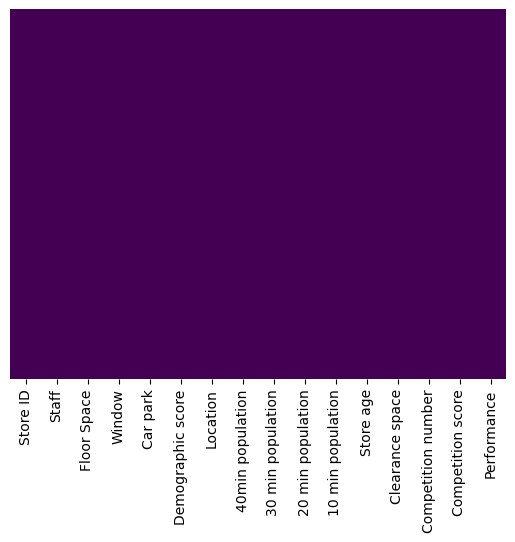

In [9]:
# check null values
# df_copy.isnull().sum()

# sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df_copy['Performance'] = labelencoder.fit_transform(df_copy['Performance'])

# target_variable = df_copy['Performance']
# feature_variables = df_copy.drop(['Performance'], axis=1)

# correlations = feature_variables.corrwith(target_variable)
# # print(correlations)

# plt.bar(correlations.index, correlations.values)
# plt.title('Correlation with Target Variable')
# plt.xlabel('Feature Variables')
# plt.ylabel('Correlation')

# plt.xticks(rotation=90)

# plt.show()

In [11]:
train.drop(['10 min population', '20 min population'], axis=1, inplace=True)

test.drop(['10 min population', '20 min population'], axis=1, inplace=True)

df_copy.head(2)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good


### divide data into categorical and numerical

In [12]:
# TRAIN SET
train_categorical = [col for col in train.columns if train[col].dtype == 'O'] #take out categorical columns
train_numeric = [col for col in train.columns if train[col].dtype != 'O'] #take out numeric columns

train[train_numeric].head(2)

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,Store age,Clearance space,Competition number,Competition score
15,13132,6,11824,104,14,1043277,1004546,6,225,11,19
83,63017,5,16652,116,12,1931932,1547591,6,280,17,14


In [13]:
train[train_categorical].head(2)

,Car park,Location,Performance
15,Yes,High Street,Bad
83,N,High Street,Bad


In [14]:
# TEST SET
test_categorical = [col for col in test.columns if test[col].dtype == 'O'] #take out categorical columns
test_numeric = [col for col in test.columns if test[col].dtype != 'O'] #take out numeric columns

test[test_numeric].head(2)
# X_test[test_categorical].head(2)

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,Store age,Clearance space,Competition number,Competition score
73,58882,5,13989,109,19,1087241,1026797,8,247,12,18
45,40676,9,14948,112,15,1892976,1100161,4,263,19,17


# CATEGORICAL DATA

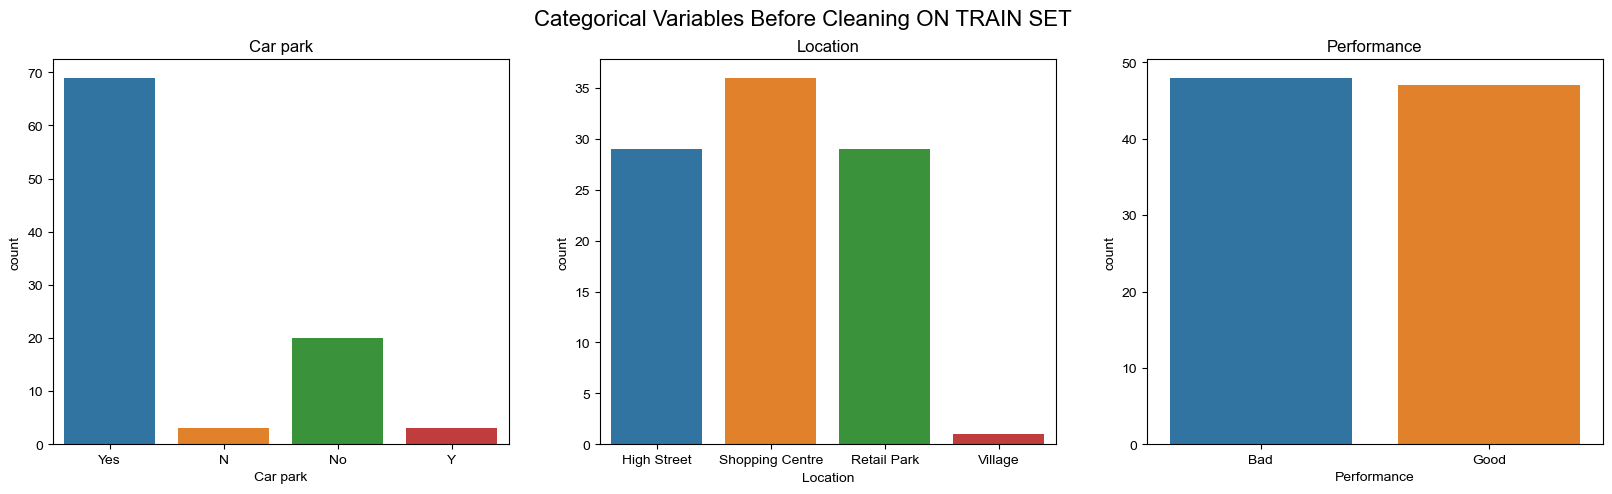

In [15]:
# TRAIN DATA
fig, axs = plt.subplots(1, len(train_categorical), figsize=(20, 5))

for i, col in enumerate(train_categorical):
    sns.countplot(x=col, data=train, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Categorical Variables Before Cleaning ON TRAIN SET', fontsize=16)
sns.set_style('whitegrid')
plt.show()

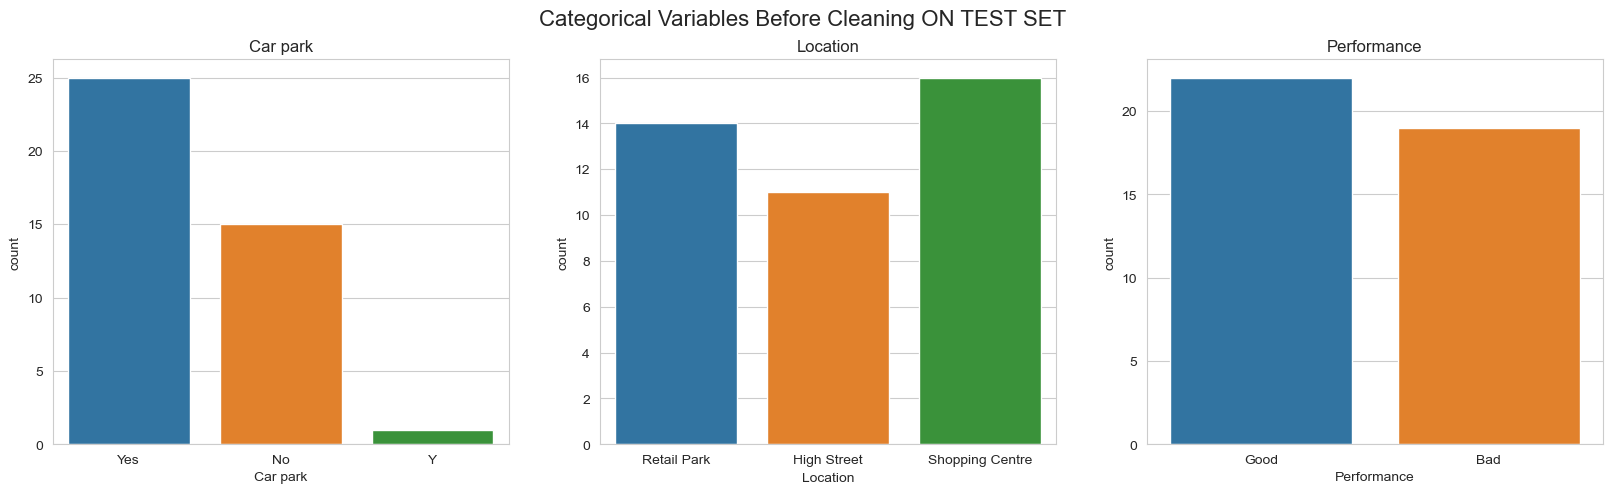

In [16]:
# TEST DATA
fig, axs = plt.subplots(1, len(test_categorical), figsize=(20, 5))

for i, col in enumerate(test_categorical):
    sns.countplot(x=col, data=test, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Categorical Variables Before Cleaning ON TEST SET', fontsize=16)
sns.set_style('whitegrid')
plt.show()

### Handling rare categorical values

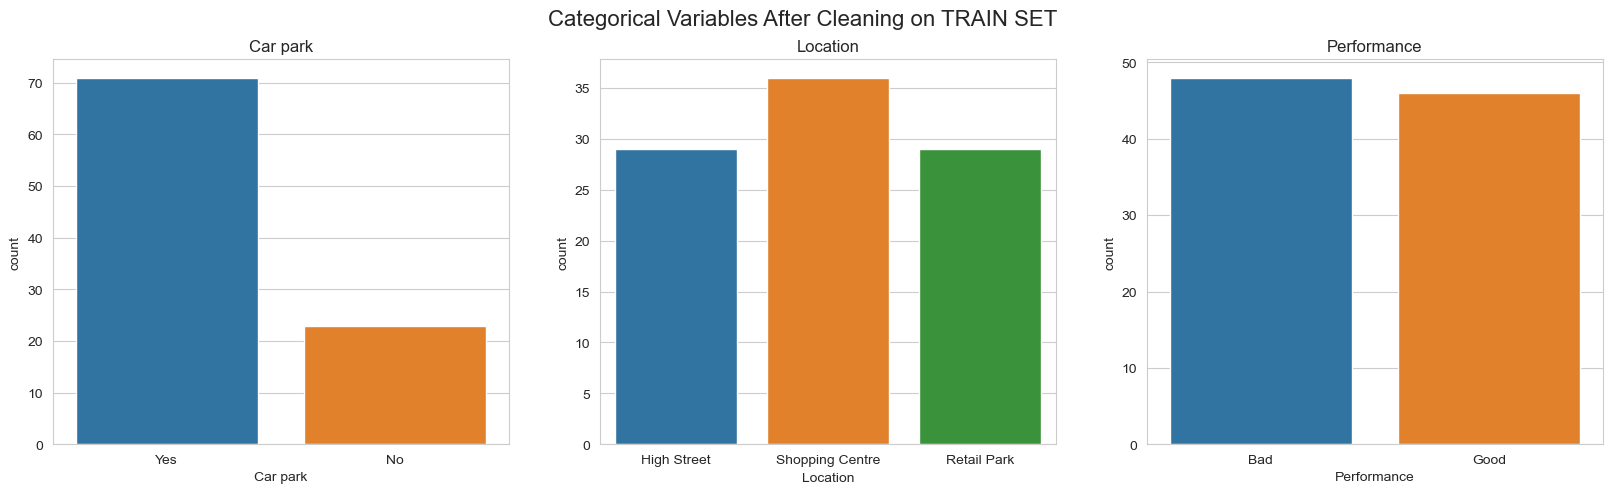

In [17]:
# https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0

# # TRAIN SET

# train["Country"] = train["Country"].replace("France", "UK")

train["Car park"] = train["Car park"].replace("Y", "Yes")
train["Car park"] = train["Car park"].replace("N", "No")
train = train[(train.Location!="Village")]

fig, axs = plt.subplots(1, len(train_categorical), figsize=(20, 5))

for i, col in enumerate(train_categorical):
    sns.countplot(x=col, data=train, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Categorical Variables After Cleaning on TRAIN SET', fontsize=16)
sns.set_style('whitegrid')
plt.show()

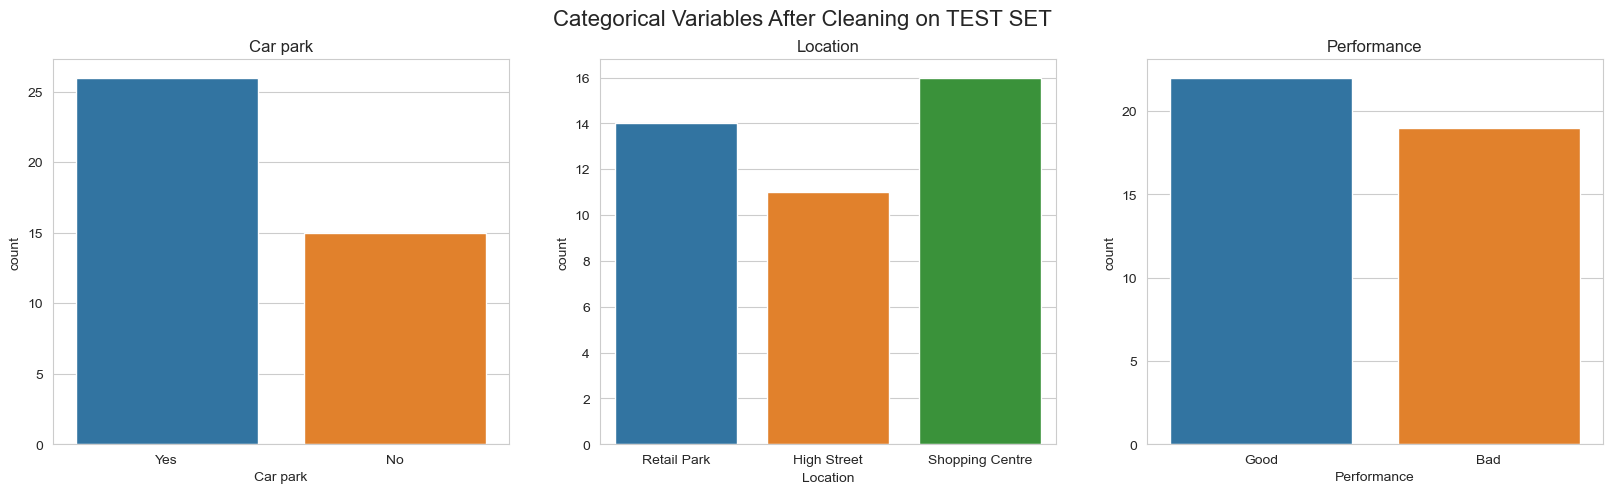

In [18]:
# TEST SET

test["Car park"] = test["Car park"].replace("Y", "Yes")
test["Car park"] = test["Car park"].replace("N", "No")

# X_test["Country"] = X_test["Country"].replace("France", "UK")
# X_test = X_test[(X_test.Location!="Village")]

fig, axs = plt.subplots(1, len(test_categorical), figsize=(20, 5))

for i, col in enumerate(test_categorical):
    sns.countplot(x=col, data=test, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Categorical Variables After Cleaning on TEST SET', fontsize=16)
sns.set_style('whitegrid')
plt.show()

# Normalize categorical variables

### converting categorical to binary values

In [19]:
# label encoding categorical target variable
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# TRAIN SET
train['Performance'] = labelencoder.fit_transform(train['Performance'])

# TEST SET
test['Performance'] = labelencoder.fit_transform(test['Performance'])

In [20]:
train.head(3)

,Store ID,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
15,13132,6,11824,104,Yes,14,High Street,1043277,1004546,6,225,11,19,0
83,63017,5,16652,116,No,12,High Street,1931932,1547591,6,280,17,14,0
39,35207,5,13127,107,No,16,High Street,1171849,1084983,7,235,19,10,0


In [21]:
# hot encoding categorical feature variables

# TRAIN SET
train = pd.get_dummies(train, columns=['Car park', 'Location'])

train.head(3)

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance,Car park_No,Car park_Yes,Location_High Street,Location_Retail Park,Location_Shopping Centre
15,13132,6,11824,104,14,1043277,1004546,6,225,11,19,0,0,1,1,0,0
83,63017,5,16652,116,12,1931932,1547591,6,280,17,14,0,1,0,1,0,0
39,35207,5,13127,107,16,1171849,1084983,7,235,19,10,0,1,0,1,0,0


In [22]:
# TEST SET
test = pd.get_dummies(test, columns=['Car park', 'Location'])

test.head(3)

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance,Car park_No,Car park_Yes,Location_High Street,Location_Retail Park,Location_Shopping Centre
73,58882,5,13989,109,19,1087241,1026797,8,247,12,18,1,0,1,0,1,0
45,40676,9,14948,112,15,1892976,1100161,4,263,19,17,1,1,0,1,0,0
60,50703,5,12604,106,12,1359135,1218693,10,242,12,15,1,0,1,0,0,1


# NUMERICAL DATA

## further divide numeric into discrete and continous

In [23]:
# TRAIN DATA
# Take out continous values from numeric
train_discrete = [col for col in train_numeric if col in train.columns and train[col].nunique() <= 25]

# Take out discrete values from numeric
train_continous = [col for col in train_numeric if col in train.columns and col not in train_discrete]

train[train_continous].head(2)

,Store ID,Floor Space,40min population,30 min population,Clearance space
15,13132,11824,1043277,1004546,225
83,63017,16652,1931932,1547591,280


In [24]:
train[train_discrete].head(2)

,Staff,Window,Demographic score,Store age,Competition number,Competition score
15,6,104,14,6,11,19
83,5,116,12,6,17,14


In [25]:
# TEST DATA
# Take out continous values from numeric
test_discrete = [col for col in test_numeric if col in test.columns and test[col].nunique() <= 25]

# Take out discrete values from numeric
test_continous = [col for col in test_numeric if col in test.columns and col not in test_discrete]

test[test_continous].head(2)

,Store ID,Floor Space,40min population,30 min population,Clearance space
73,58882,13989,1087241,1026797,247
45,40676,14948,1892976,1100161,263


In [26]:
test[test_discrete].head(2)

,Staff,Window,Demographic score,Store age,Competition number,Competition score
73,5,109,19,8,12,18
45,9,112,15,4,19,17


# DISCRETE NUMS

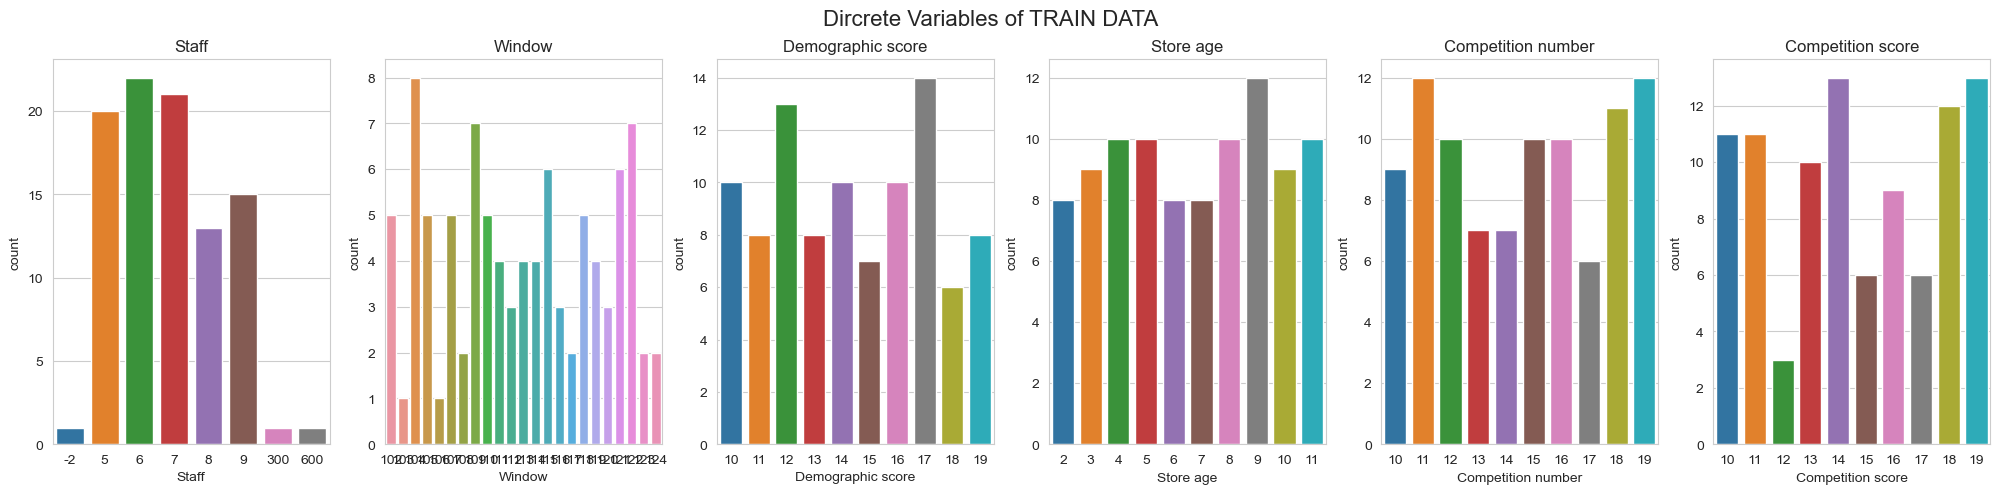

In [27]:
# TRAIN DATA
fig, axs = plt.subplots(1, len(train_discrete), figsize=(25, 5))

for i, col in enumerate(train_discrete):
    sns.countplot(x=col, data=train, ax=axs[i])
    axs[i].set_title(col)
   

fig.suptitle('Dircrete Variables of TRAIN DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

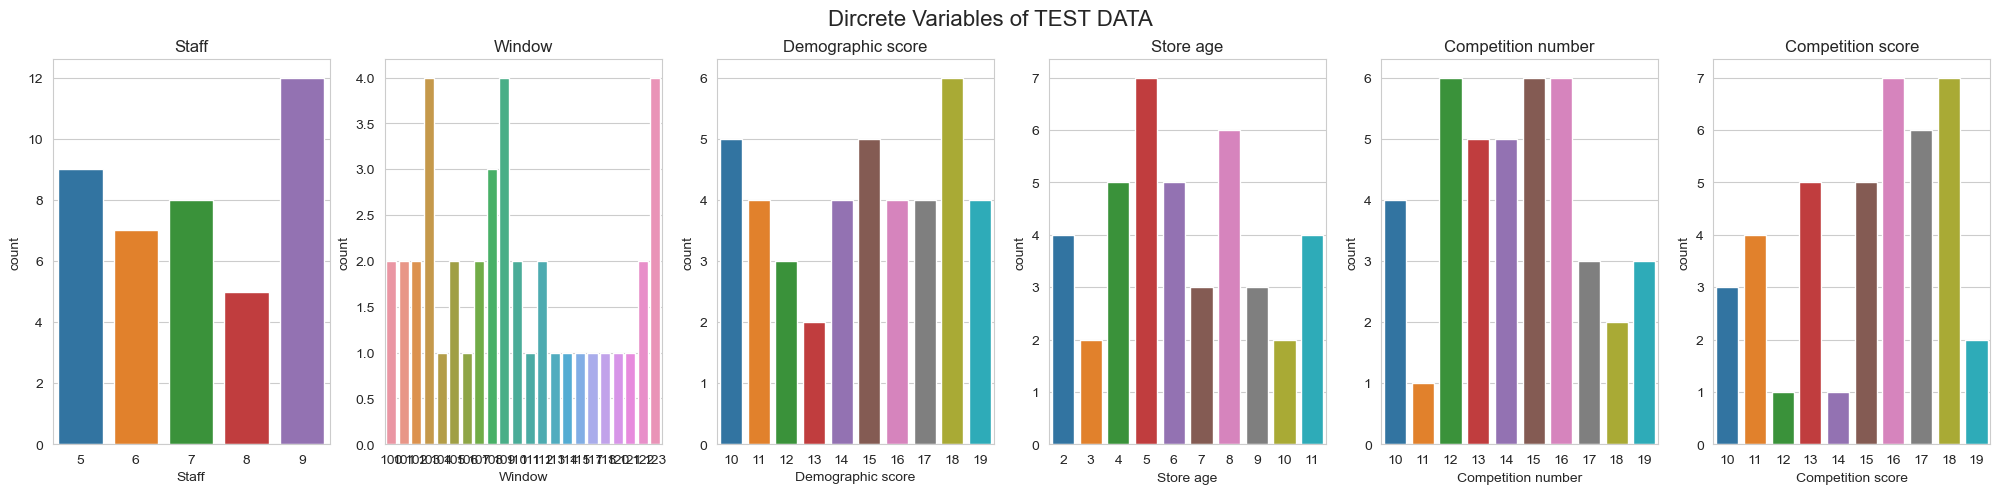

In [28]:
# TEST DATA
fig, axs = plt.subplots(1, len(test_discrete), figsize=(25, 5))

for i, col in enumerate(test_discrete):
    sns.countplot(x=col, data=test, ax=axs[i])
    axs[i].set_title(col)
   

fig.suptitle('Dircrete Variables of TEST DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

### checking outliers of discrete

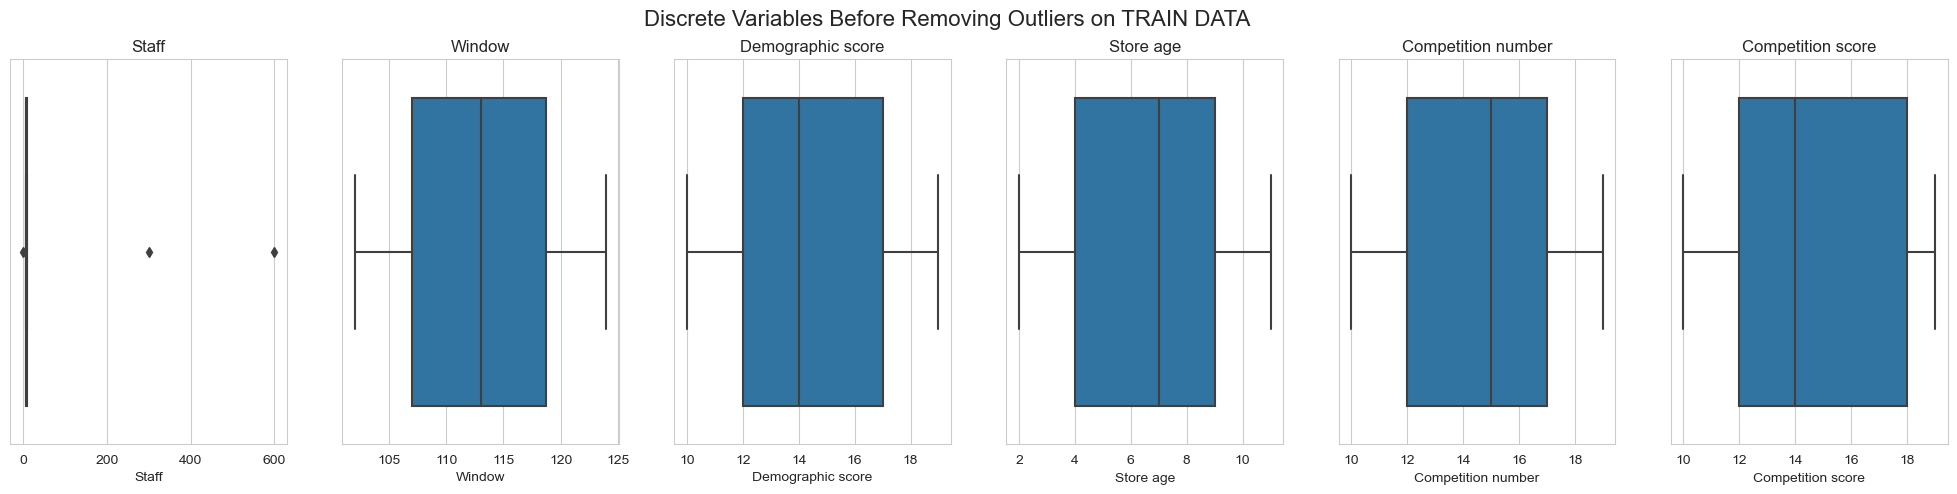

In [29]:
# TRAIN DATA

fig, axs = plt.subplots(1, len(train_discrete), figsize=(25, 5))

for i, col in enumerate(train_discrete):
    sns.boxplot(x=col, data=train, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Discrete Variables Before Removing Outliers on TRAIN DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

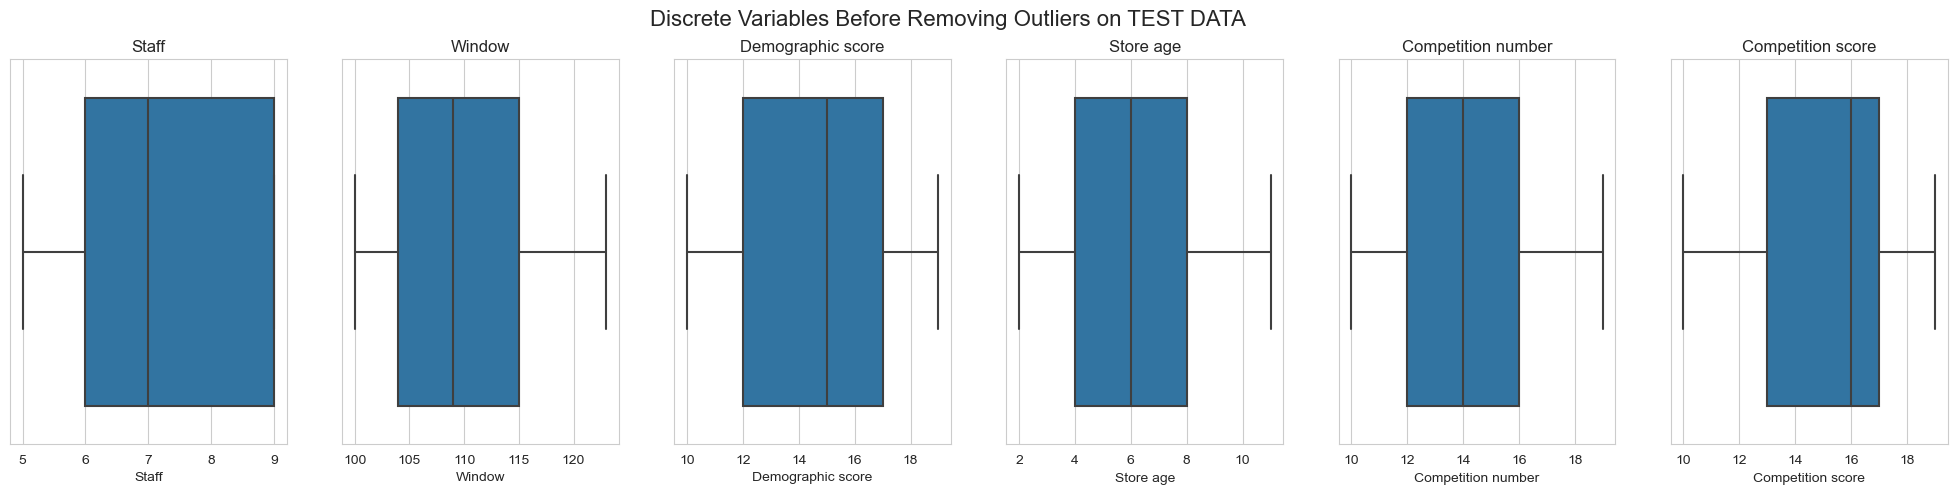

In [30]:
# TEST DATA

fig, axs = plt.subplots(1, len(test_discrete), figsize=(25, 5))

for i, col in enumerate(test_discrete):
    sns.boxplot(x=col, data=test, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Discrete Variables Before Removing Outliers on TEST DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

### cleaned staff OUTLIER

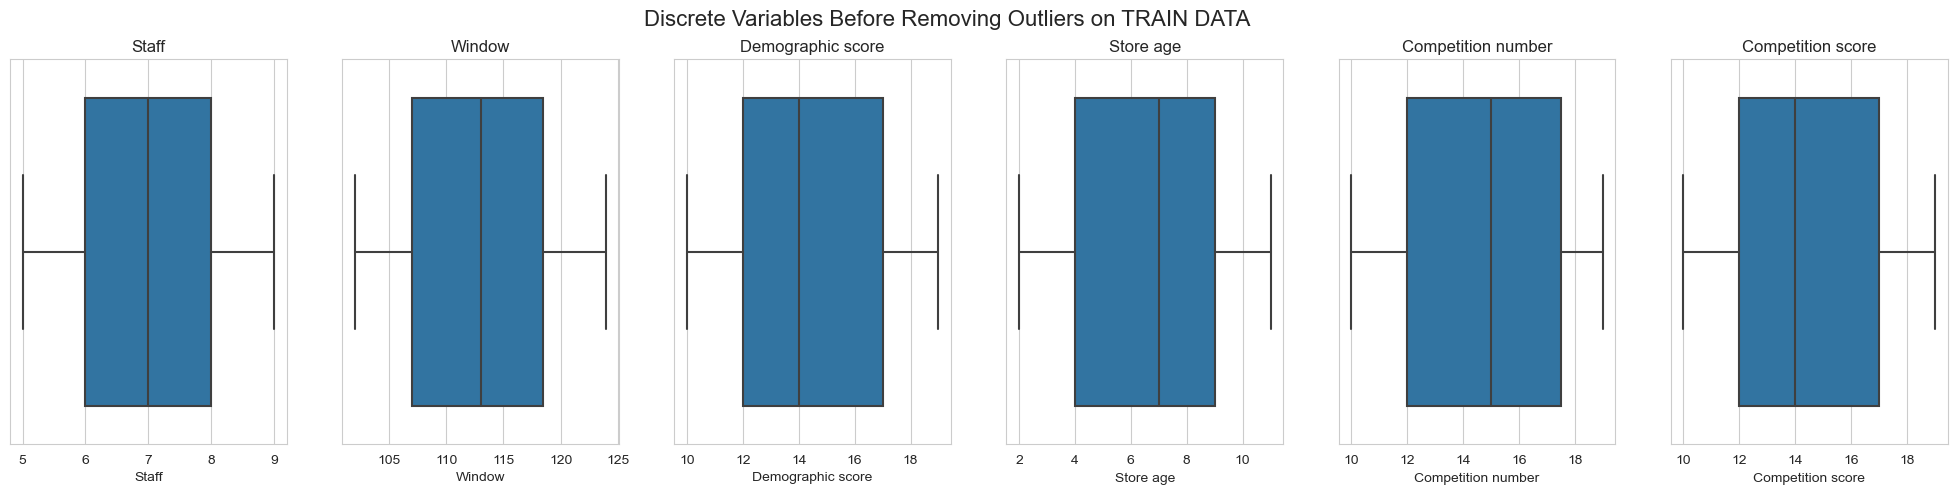

In [31]:
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/

# TRAIN DATA
train.drop(train[(train['Staff'] >= 300) | (train['Staff'] == -2)].index, inplace=True)

fig, axs = plt.subplots(1, len(train_discrete), figsize=(25, 5))

for i, col in enumerate(train_discrete):
    sns.boxplot(x=col, data=train, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Discrete Variables Before Removing Outliers on TRAIN DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

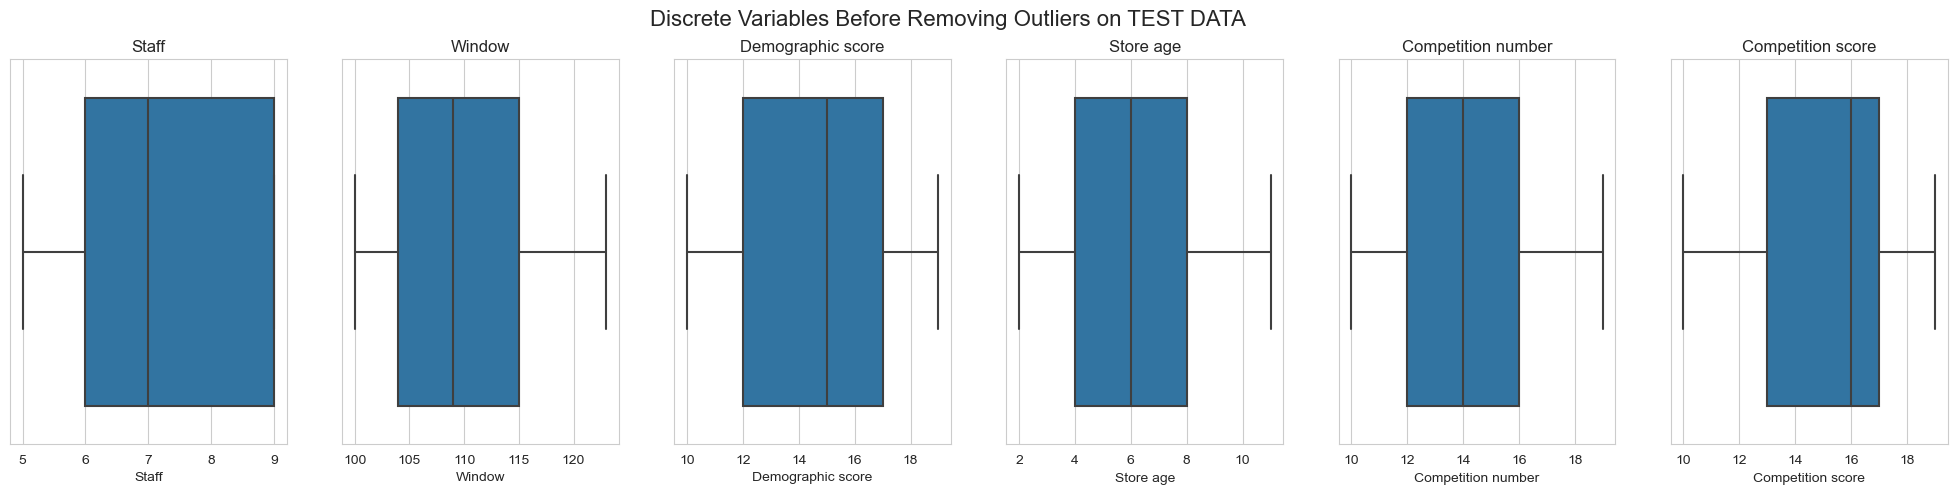

In [32]:
# TEST DATA
# X_test.drop(X_test[X_test['Staff'] >= 300].index, inplace=True)
# X_test.drop(X_test[X_test['Staff'] == -2].index, inplace=True)

test.drop(test[(test['Staff'] >= 300) | (test['Staff'] == -2)].index, inplace=True)

fig, axs = plt.subplots(1, len(test_discrete), figsize=(25, 5))

for i, col in enumerate(test_discrete):
    sns.boxplot(x=col, data=test, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Discrete Variables Before Removing Outliers on TEST DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

### Checking Outlier on continous variable

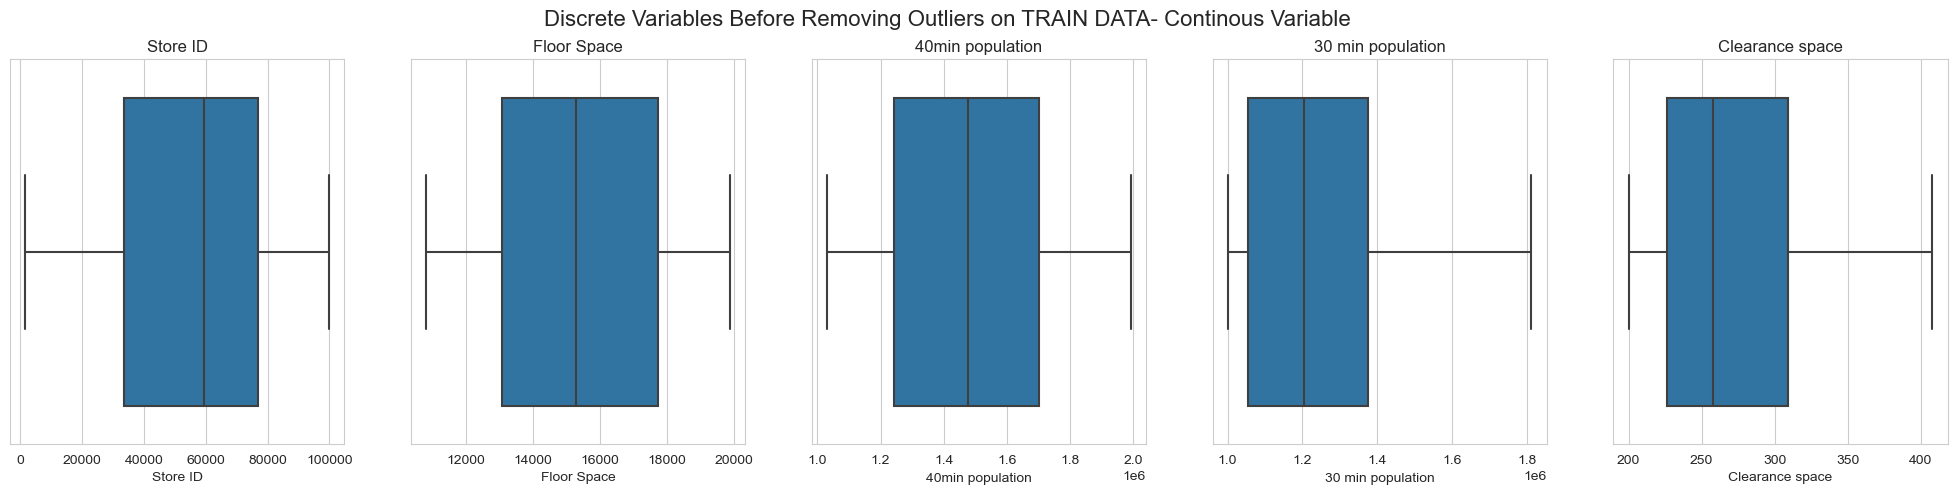

In [33]:
# TRAIN DATA

fig, axs = plt.subplots(1, len(train_continous), figsize=(25, 5))

for i, col in enumerate(train_continous):
    sns.boxplot(x=col, data=train, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Discrete Variables Before Removing Outliers on TRAIN DATA- Continous Variable', fontsize=16)
sns.set_style('whitegrid')
plt.show()

# no outliers so left as it is

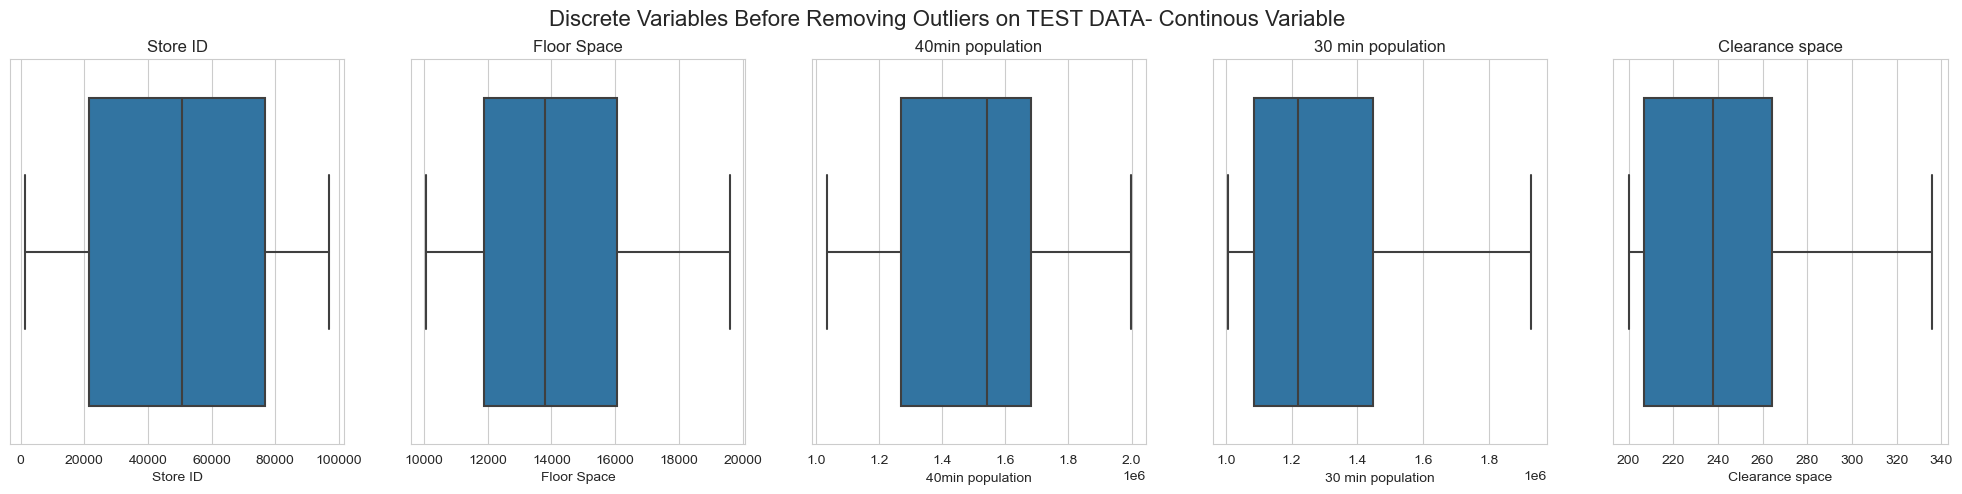

In [34]:
# TEST DATA

fig, axs = plt.subplots(1, len(test_continous), figsize=(25, 5))

for i, col in enumerate(test_continous):
    sns.boxplot(x=col, data=test, ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Discrete Variables Before Removing Outliers on TEST DATA- Continous Variable', fontsize=16)
sns.set_style('whitegrid')
plt.show()

# no outliers so left as it is

## one hot encoding on discrete nums

In [35]:
train[train_discrete].head(2)

,Staff,Window,Demographic score,Store age,Competition number,Competition score
15,6,104,14,6,11,19
83,5,116,12,6,17,14


In [36]:
# TRAIN DATA
train = pd.get_dummies(train, columns=['Staff', 'Store age'])

# TEST DATA
test = pd.get_dummies(test, columns=['Staff', 'Store age'])

In [37]:
train.head(2)

,Store ID,Floor Space,Window,Demographic score,40min population,30 min population,Clearance space,Competition number,Competition score,Performance,...,Store age_2,Store age_3,Store age_4,Store age_5,Store age_6,Store age_7,Store age_8,Store age_9,Store age_10,Store age_11
15,13132,11824,104,14,1043277,1004546,225,11,19,0,...,0,0,0,0,1,0,0,0,0,0
83,63017,16652,116,12,1931932,1547591,280,17,14,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
test.head(2)

,Store ID,Floor Space,Window,Demographic score,40min population,30 min population,Clearance space,Competition number,Competition score,Performance,...,Store age_2,Store age_3,Store age_4,Store age_5,Store age_6,Store age_7,Store age_8,Store age_9,Store age_10,Store age_11
73,58882,13989,109,19,1087241,1026797,247,12,18,1,...,0,0,0,0,0,0,1,0,0,0
45,40676,14948,112,15,1892976,1100161,263,19,17,1,...,0,0,1,0,0,0,0,0,0,0


# CONTINOUS VAR

## Normal Distribution

In [39]:
# CHECKING ZERO VALUES IN CONTINOUS
# TRAIN SET
print('Train Data')
for col in train_continous:
    if (np.array(train[col]) == 0).any():
        print(f"There are zero values in the '{col}' column")
    else:
        print(f"There are no zero values in the '{col}' column")

# TEST SET
print('\n Test Data')
for col in test_continous:
    if (np.array(test[col]) == 0).any():
        print(f"There are zero values in the '{col}' column")
    else:
        print(f"There are no zero values in the '{col}' column")

Train Data
There are no zero values in the 'Store ID' column
There are no zero values in the 'Floor Space' column
There are no zero values in the '40min population' column
There are no zero values in the '30 min population' column
There are no zero values in the 'Clearance space' column

 Test Data
There are no zero values in the 'Store ID' column
There are no zero values in the 'Floor Space' column
There are no zero values in the '40min population' column
There are no zero values in the '30 min population' column
There are no zero values in the 'Clearance space' column


## convert continous skewed to normal distribution

In [40]:
# Yeo-Johnson transformation - applies a power transformation - transform numerical columns to normal distribution

# https://medium.com/analytics-vidhya/techniques-to-transform-data-distribution-565a4d0f2da
# https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

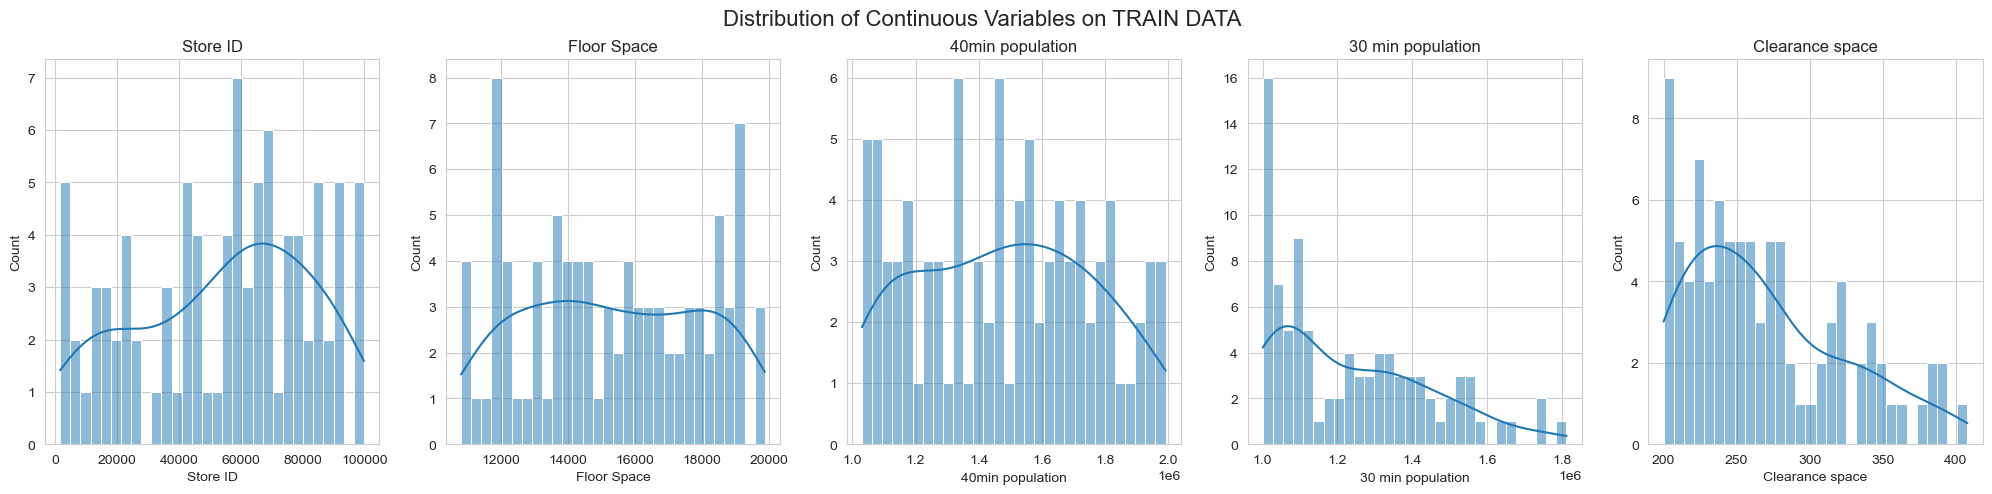

The skewness of Continous variable Store ID : -0.3129866822587104
The skewness of Continous variable Floor Space : 0.014140345972904797
The skewness of Continous variable 40min population : 0.055001218910430756
The skewness of Continous variable 30 min population : 0.7652912190731634
The skewness of Continous variable Clearance space : 0.7642349130449688


In [41]:
# TRAIN DATA

fig, axs = plt.subplots(1, len(train_continous), figsize=(25, 5))

for i, col in enumerate(train_continous):
    sns.histplot(x=col, data=train, ax=axs[i], bins=30, kde=True)
    axs[i].set_title(col)

fig.suptitle('Distribution of Continuous Variables on TRAIN DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

# Check skewness
for i in train_continous:
    print(f'The skewness of Continous variable {i} : {train[i].skew()}')

In [42]:
# TRAIN DATA

# ONLY NORMALIZE THE COLUMNS THAT HAVE HIGH SKEWNESS
from scipy import stats

cols = ['30 min population', 'Clearance space', 'Store ID']
for col in cols:
    train[col] = stats.yeojohnson(train[col])[0]
    
train = pd.DataFrame(train, columns=train.columns)

train.head(2)

# Check skewness after normalizing
for i in train_continous:
    print(f'The skewness of Continous variable {i} after ND : {train[i].skew()}')

The skewness of Continous variable Store ID after ND : -0.3971154570561544
The skewness of Continous variable Floor Space after ND : 0.014140345972904797
The skewness of Continous variable 40min population after ND : 0.055001218910430756
The skewness of Continous variable 30 min population after ND : 0
The skewness of Continous variable Clearance space after ND : 0.09104936672390875


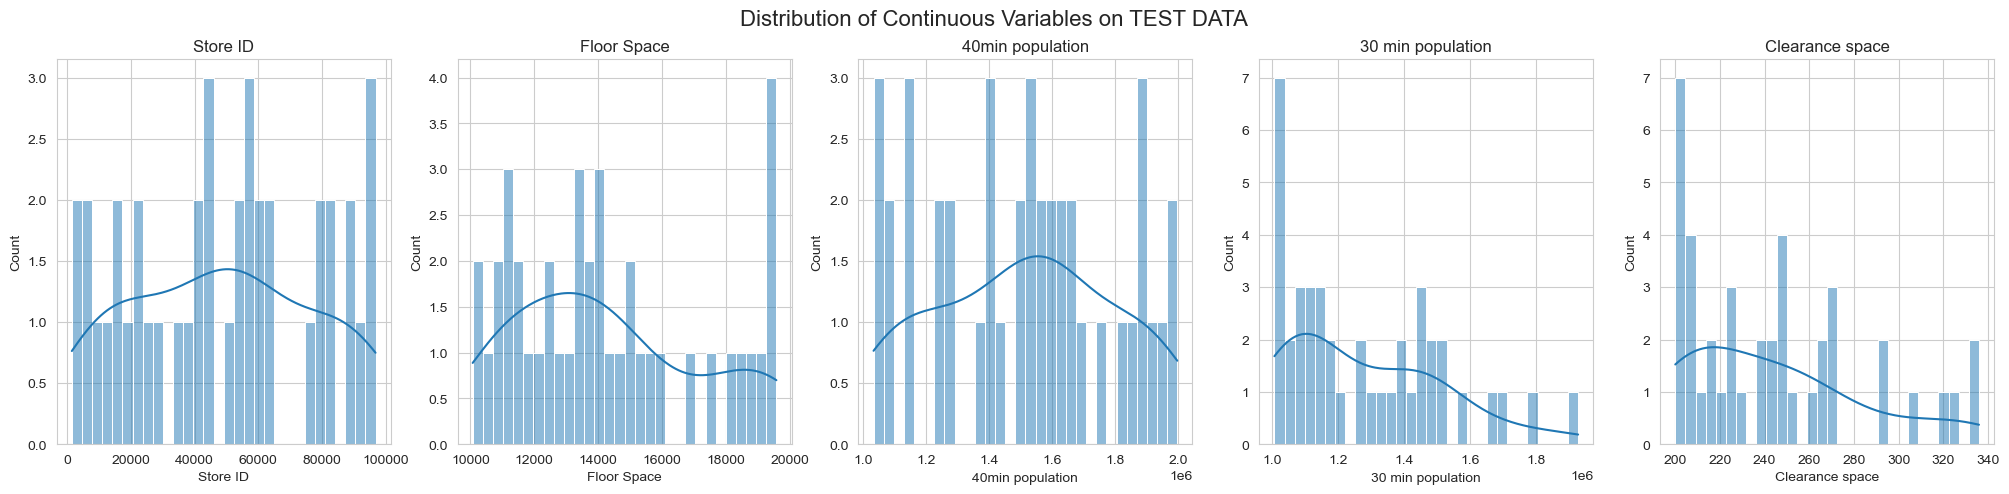

The skewness of Continous variable Store ID : 0.04704320045565601
The skewness of Continous variable Floor Space : 0.4804730493557348
The skewness of Continous variable 40min population : -0.040703676890867124
The skewness of Continous variable 30 min population : 0.8151926839501644
The skewness of Continous variable Clearance space : 0.8764268799084459


In [43]:
# TEST DATA

fig, axs = plt.subplots(1, len(test_continous), figsize=(25, 5))

for i, col in enumerate(test_continous):
    sns.histplot(x=col, data=test, ax=axs[i], bins=30, kde=True)
    axs[i].set_title(col)

fig.suptitle('Distribution of Continuous Variables on TEST DATA', fontsize=16)
sns.set_style('whitegrid')
plt.show()

# Check skewness
for i in test_continous:
    print(f'The skewness of Continous variable {i} : {test[i].skew()}')

In [44]:
# TRAIN DATA

# ONLY NORMALIZED COLUMNS THAT HAVE HIGH SKEWNESS
from scipy import stats

cols = ['30 min population', 'Clearance space', 'Store ID']
for col in cols:
    test[col] = stats.yeojohnson(test[col])[0]
    
test = pd.DataFrame(test, columns=test.columns)

test.head(2)

# Check skewness after normalizing
for i in test_continous:
    print(f'The skewness of Continous variable {i} after ND : {test[i].skew()}')

The skewness of Continous variable Store ID after ND : -0.28915869267384314
The skewness of Continous variable Floor Space after ND : 0.4804730493557348
The skewness of Continous variable 40min population after ND : -0.040703676890867124
The skewness of Continous variable 30 min population after ND : 0
The skewness of Continous variable Clearance space after ND : 0.0


## scaling

In [45]:
train_continous

['Store ID',
 'Floor Space',
 '40min population',
 '30 min population',
 'Clearance space']

In [46]:
train_discrete

['Staff',
 'Window',
 'Demographic score',
 'Store age',
 'Competition number',
 'Competition score']

In [47]:
from sklearn.preprocessing import MinMaxScaler

# TRAIN DATA

train['Floor Space'] = train['Floor Space'].astype(float)
discrete_features = ["Window", "Demographic score", "Competition number", "Competition score"]

mmscaler = MinMaxScaler()
for i in train_continous:
    if train[i].dtype == 'float64' or train[i].dtype == 'int64':
        train[i] = mmscaler.fit_transform(train[[i]])

for j in discrete_features:
    if train[j].dtype == 'float64' or train[j].dtype == 'int64':
        train[j] = mmscaler.fit_transform(train[[j]])
        
train.head(2)

,Store ID,Floor Space,Window,Demographic score,40min population,30 min population,Clearance space,Competition number,Competition score,Performance,...,Store age_2,Store age_3,Store age_4,Store age_5,Store age_6,Store age_7,Store age_8,Store age_9,Store age_10,Store age_11
15,0.137568,0.112521,0.090909,0.444444,0.013401,0.010986,0.235874,0.111111,1.000000,0,...,0,0,0,0,1,0,0,0,0,0
83,0.648890,0.645119,0.636364,0.222222,0.938599,0.837891,0.587786,0.777778,0.444444,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
# TEST DATA

# print(df_copy['Floor Space'].dtype)
test['Floor Space'] = test['Floor Space'].astype(float)

discrete_features = ["Window", "Demographic score", "Competition number", "Competition score"]

mmscaler = MinMaxScaler()
for i in test_continous:
    if test[i].dtype == 'float64' or test[i].dtype == 'int64':
        test[i] = mmscaler.fit_transform(test[[i]])

for j in discrete_features:
    if test[j].dtype == 'float64' or test[j].dtype == 'int64':
        test[j] = mmscaler.fit_transform(test[[j]])
        
test.head(2)

,Store ID,Floor Space,Window,Demographic score,40min population,30 min population,Clearance space,Competition number,Competition score,Performance,...,Store age_2,Store age_3,Store age_4,Store age_5,Store age_6,Store age_7,Store age_8,Store age_9,Store age_10,Store age_11
73,0.692433,0.411666,0.391304,1.000000,0.054771,0.050537,0.549777,0.222222,0.888889,1,...,0,0,0,0,0,0,1,0,0,0
45,0.523370,0.512454,0.521739,0.555556,0.891880,0.209969,0.668660,1.000000,0.777778,1,...,0,0,1,0,0,0,0,0,0,0


# correlation with target var

In [49]:
# TRAIN DATA

# target_variable_train = train['Performance']

# # select the feature variables
# feature_variables_train = train.drop(['Performance'], axis=1)

# # compute the correlation between each feature variable and the target variable
# correlations_train = feature_variables_train.corrwith(target_variable_train)

# # print(correlations)

# plt.bar(correlations_train.index, correlations_train.values)
# plt.title('Correlation with Target Variable ON TRAIN SET')
# plt.xlabel('Feature Variables')
# plt.ylabel('Correlation')

# plt.xticks(rotation=90)

# plt.show()

In [50]:
# removing columns with zero corr

# train.drop('10 min population', axis=1, inplace=True)
# train.drop('20 min population', axis=1, inplace=True)
# train.drop('Location_Retail Park', axis=1, inplace=True)
# train.drop('Store age_5', axis=1, inplace=True)

# train.drop('Country_UK', axis=1, inplace=True)

In [51]:
# TEST DATA

# target_variable_test = test['Performance']

# # select the feature variables
# feature_variables_test = test.drop(['Performance'], axis=1)

# # compute the correlation between each feature variable and the target variable
# correlations_test = feature_variables_test.corrwith(target_variable_test)

# plt.bar(correlations_test.index, correlations_test.values)
# plt.title('Correlation with Target Variable ON TEST SET')
# plt.xlabel('Feature Variables')
# plt.ylabel('Correlation')

# plt.xticks(rotation=90)

# plt.show()

In [52]:
# removing columns with zero corr

# test.drop('10 min population', axis=1, inplace=True)
# test.drop('20 min population', axis=1, inplace=True)
# test.drop('Location_Retail Park', axis=1, inplace=True)
# test.drop('Store age_5', axis=1, inplace=True)

# test.drop('Country_UK', axis=1, inplace=True)

### Set traget and feature variable

In [53]:
X_train = train.drop(['Performance'], axis=1)
y_train = train[['Performance']]

X_test = test.drop(['Performance'], axis=1)
y_test = test[['Performance']]

# MODEL

In [54]:
# len(X_train.columns)
# X_train.columns

print(f'train data: {len(X_train.columns)}')
# print(f'train data: {len(y_train.columns)}')

print(f'test data: {len(X_test.columns)}')
# print(f'test data: {len(y_test.columns)}')

train data: 29
test data: 29


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, make_scorer, f1_score
from scipy.stats import randint as sp_randint

In [57]:
from sklearn.linear_model import LogisticRegression

In [74]:
lg = LogisticRegression(C=1, solver='newton-cg', penalty='l2')
lg.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [75]:
cv_scores = cross_val_score(lg, X_train, y_train, cv=5)
test_score = lg.score(X_test, y_test)

print("Cross-validation score: %0.2f" % cv_scores.mean())
print("Test score: %0.2f" % test_score)

Cross-validation score: 0.81
Test score: 0.66


In [60]:
# from sklearn.model_selection import RepeatedStratifiedKFold

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
         'penalty' : ['l1', 'l2']}

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

In [61]:
log_model = LogisticRegression()
grid_search = GridSearchCV(estimator=log_model, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [62]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836257 using {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.516374 (0.022083) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.516374 (0.022083) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.516374 (0.022083) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.747368 (0.082570) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.516374 (0.022083) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.604678 (0.087023) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604678 (0.087023) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.757895 (0.045838) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.00

In [63]:
lg1 = LogisticRegression(**grid_result.best_params_)
lg1.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [64]:
cv_scores1 = cross_val_score(lg1, X_train, y_train, cv=5)
test_score1 = lg1.score(X_test, y_test)

print("Cross-validation score: %0.2f" % cv_scores1.mean())
print("Test score: %0.2f" % test_score1)

Cross-validation score: 0.84
Test score: 0.71


In [65]:
pred_test1 = lg1.predict(X_test)
pred_train1 = lg1.predict(X_train)

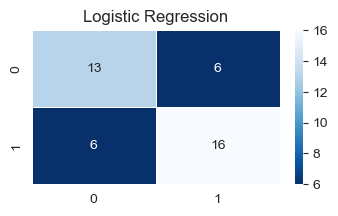

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_test1)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.6, cmap='Blues_r')
plt.title("Logistic Regression")
plt.show()

In [67]:
print(f'LogReg Report on test: \n\n {(classification_report(y_test,pred_test1))}')
print(f'LogReg Report on train: \n\n {(classification_report(y_train,pred_train1))}')

LogReg Report on test: 

               precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.73      0.73      0.73        22

    accuracy                           0.71        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.71      0.71      0.71        41

LogReg Report on train: 

               precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.84      0.86      0.85        44

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [68]:
n = 10
scores_lst = []
cv_score_lst = []

for i in range(n):
    lg1 = LogisticRegression(**grid_result.best_params_)
    lg1.fit(X_train, y_train)
    
    cv_scores_n = cross_val_score(lg1, X_train, y_train, cv=5)
    cv_score_lst.append(cv_scores_n.mean())
    
    test_score_n = lg1.score(X_test, y_test)
    scores_lst.append(test_score_n)
    
#     pred = mlp_best.predict(X_test)
#     class_rep= classification_report(y_test,pred)
#     test_report.append(class_rep)

print("Test scores:", scores_lst)
print("\n Mean test score:", sum(scores_lst)/n)
print("\n Cross-validation scores:", cv_score_lst)
print("\n Mean cross-validation score:", sum(cv_score_lst)/n)

Test scores: [0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317, 0.7073170731707317]

 Mean test score: 0.7073170731707316

 Cross-validation scores: [0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205, 0.8362573099415205]

 Mean cross-validation score: 0.8362573099415205
